In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
# https://github.com/jsvine/weightedcalcs
import weightedcalcs as wc

In [2]:
#read in data 
df = pd.read_csv('data/voter-survey-december16.csv')
print(df.shape)
df.presvote16post_2016.isna().sum()

(8000, 668)


394

In [3]:
# find features with text responses 
def find_text_col(df):
    text_col = []
    pattern = '_t_'
    pattern2 = '_rnd_'
    pattern3 = '_other_'
    p = re.compile(pattern)
    p2 = re.compile(pattern2)
    p3 = re.compile(pattern3)
    for col in df: 
        if (p.findall(col)) or (p2.findall(col)) or (p3.findall(col)):
            text_col.append(col)
    return text_col
text_col = find_text_col(df)
print(len(text_col), text_col)

117 ['presvote16post_t_2016', 'second_chance_t_2016', 'imiss_t_2016', 'race_other_2016', 'healthcov_t_2016', 'employ_t_2016', 'pid3_t_2016', 'religpew_t_2016', 'votemeth16_rnd_2016', 'presvote16post_rnd_2016', 'vote2016_cand2_rnd_2016', 'Clinton_Rubio_rnd_2016', 'Clinton_Cruz_rnd_2016', 'Sanders_Trump_rnd_2016', 'Sanders_Rubio_rnd_2016', 'second_chance_rnd_2016', 'obamaapp_rnd_2016', 'fav_grid_row_rnd_2016', 'fav_grid_col_rnd_2016', 'PARTY_AGENDAS_D_grid_row_rnd_201', 'PARTY_AGENDAS_R_grid_row_rnd_201', 'RIGGED_SYSTEM_grid_row_rnd_2016', 'track_rnd_2016', 'persfinretro_rnd_2016', 'econtrend_rnd_2016', 'Americatrend_rnd_2016', 'futuretrend_rnd_2016', 'wealth_rnd_2016', 'values_culture_rnd_2016', 'US_respect_rnd_2016', 'trust_people_rnd_2016', 'helpful_people_rnd_2016', 'fair_people_rnd_2016', 't1_grid_row_rnd_2016', 'imiss_row_rnd_2016', 'imiss_col_rnd_2016', 'immi_contribution_rnd_2016', 'immi_naturalize_rnd_2016', 'immi_makedifficult_rnd_2016', 'immi_muslim_rnd_2016', 'abortview3_rnd_

In [4]:
# drop columns with text responses
df = df.drop(text_col, axis=1)
print(df.shape)
df.head()

(8000, 551)


case_identifier    weight  PARTY_AGENDAS_rand_2016  pp_primary16_2016  \
0              779  0.358213                        2                  1   
1             2108  0.562867                        2                  2   
2             2597  0.552138                        2                  1   
3             4148  0.207591                        1                  1   
4             4460  0.333729                        2                  2   

   pp_demprim16_2016  pp_repprim16_2016  inputstate_2016  izip_2016  \
0                1.0                NaN                6      94952   
1                NaN                1.0                4      85298   
2                1.0                NaN               55      54904   
3                3.0                NaN               40      74104   
4                NaN                4.0               48      78253   

   votereg2_2016  votereg_f_2016  ...  post_HouseCand3Name_2012  \
0              1             1.0  ...                       NaN   
1              1             1.0  ...                       NaN   
2              1             1.0  ...                       NaN   
3              1             1.0  ...                       NaN   
4              1             1.0  ...                       NaN   

   post_HouseCand3Party_2012  post_SenCand1Name_2012  post_SenCand1Party_2012  \
0                        NaN         Shelley Berkley               Democratic   
1                        NaN         Richard Carmona               Democratic   
2                        NaN           Tammy Baldwin               Democratic   
3                        NaN                     NaN                      NaN   
4                        NaN             Paul Sadler               Democratic   

   post_SenCand2Name_2012  post_SenCand2Party_2012  post_SenCand3Name_2012  \
0             Dean Heller               Republican                     NaN   
1              Jeff Flake               Republican                     NaN   
2          Tommy Thompson               Republican                     NaN   
3                     NaN                      NaN                     NaN   
4                Ted Cruz               Republican                     NaN   

   post_SenCand3Party_2012      starttime_2016        endtime_2016  
0                      NaN  29nov2016 22:59:43  29nov2016 23:28:24  
1                      NaN  29nov2016 15:41:28  29nov2016 18:58:28  
2                      NaN  29nov2016 16:08:39  29nov2016 16:32:43  
3                      NaN  14dec2016 18:46:33  14dec2016 19:11:20  
4                      NaN  01dec2016 10:17:47  01dec2016 10:59:48  

[5 rows x 551 columns]

In [5]:
# find columns associated with 2016 survey 
def find_2016_col(df):
    keep_col = []
    for col in df:
        if (col.endswith('_2016')):
            keep_col.append(col) 
    return keep_col
keep_col = find_2016_col(df)
print(df[keep_col].shape)
df[keep_col].columns
df = df[keep_col]

(8000, 210)


In [6]:
df.head()

PARTY_AGENDAS_rand_2016  pp_primary16_2016  pp_demprim16_2016  \
0                        2                  1                1.0   
1                        2                  2                NaN   
2                        2                  1                1.0   
3                        1                  1                3.0   
4                        2                  2                NaN   

   pp_repprim16_2016  inputstate_2016  izip_2016  votereg2_2016  \
0                NaN                6      94952              1   
1                1.0                4      85298              1   
2                NaN               55      54904              1   
3                NaN               40      74104              1   
4                4.0               48      78253              1   

   votereg_f_2016  regzip_2016  turnout16_2016  ...  ideo5_2016  newsint_2016  \
0             1.0          NaN             1.0  ...         3.0           1.0   
1             1.0          NaN             1.0  ...         4.0           1.0   
2             1.0          NaN             1.0  ...         3.0           1.0   
3             1.0          NaN             1.0  ...         3.0           1.0   
4             1.0          NaN             1.0  ...         4.0           1.0   

   pew_bornagain_2016  pew_religimp_2016  pew_churatd_2016  pew_prayer_2016  \
0                 2.0                  3               5.0              6.0   
1                 2.0                  1               1.0              1.0   
2                 2.0                  4               5.0              3.0   
3                 2.0                  3               5.0              3.0   
4                 2.0                  1               1.0              2.0   

   religpew_2016  ccap2012_post_2016      starttime_2016        endtime_2016  
0            2.0                   1  29nov2016 22:59:43  29nov2016 23:28:24  
1            3.0                   1  29nov2016 15:41:28  29nov2016 18:58:28  
2            2.0                   1  29nov2016 16:08:39  29nov2016 16:32:43  
3           11.0                   1  14dec2016 18:46:33  14dec2016 19:11:20  
4            3.0                   1  01dec2016 10:17:47  01dec2016 10:59:48  

[5 rows x 210 columns]

In [7]:
df.isna().sum()

PARTY_AGENDAS_rand_2016        0
pp_primary16_2016              0
pp_demprim16_2016           5026
pp_repprim16_2016           5094
inputstate_2016                0
izip_2016                      0
votereg2_2016                  0
votereg_f_2016                90
regzip_2016                 7761
turnout16_2016                48
vote_usual_2016             7684
votemeth16_2016              389
presvote16post_2016          394
vote2016_cand2_2016         7613
vote_for_against_2016        998
Clinton_Rubio_2016            26
Clinton_Cruz_2016             25
Sanders_Trump_2016            25
Sanders_Rubio_2016            35
wished_voted_2016           7630
vote_regrets_2016            392
second_chance_2016          7698
accurately_counted_2016      399
accurately_counted2_2016      36
obamaapp_2016                  6
fav_trump_2016                47
fav_cruz_2016                 49
fav_ryan_2016                 64
fav_romn_2016                 54
fav_obama_2016                47
          

In [9]:
df.dtypes
to_drop = ['regzip_2016', 'endtime_2016', 'starttime_2016']
df = df.drop(to_drop, axis=1,)

In [16]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(df, df.shape[1])

obamaapp_2016          fav_obama_2016            0.868630
PARTY_AGENDAS_D6_2016  imiss_l_2016              0.831654
fav_obama_2016         fav_hrc_2016              0.828403
Clinton_Rubio_2016     Clinton_Cruz_2016         0.825246
PARTY_AGENDAS_R6_2016  imiss_l_2016              0.808747
imiss_d_2016           imiss_l_2016              0.789910
obamaapp_2016          fav_hrc_2016              0.769655
                       pid7_2016                 0.743181
pew_religimp_2016      pew_prayer_2016           0.736899
Sanders_Trump_2016     Sanders_Rubio_2016        0.736698
milstat_4_2016         milstat_5_2016            0.730332
PARTY_AGENDAS_D1_2016  PARTY_AGENDAS_D9_2016     0.729983
vote2016_cand2_2016    second_chance_2016        0.719683
                       Clinton_Cruz_2016         0.719379
ambornin_2016          amlived_2016              0.715617
race_majority_1_2016   race_majority_2_2016      0.713665
Clinton_Cruz_2016      fav_hrc_2016              0.707209
fav_cruz_2016 

In [20]:
corr = df.corr()

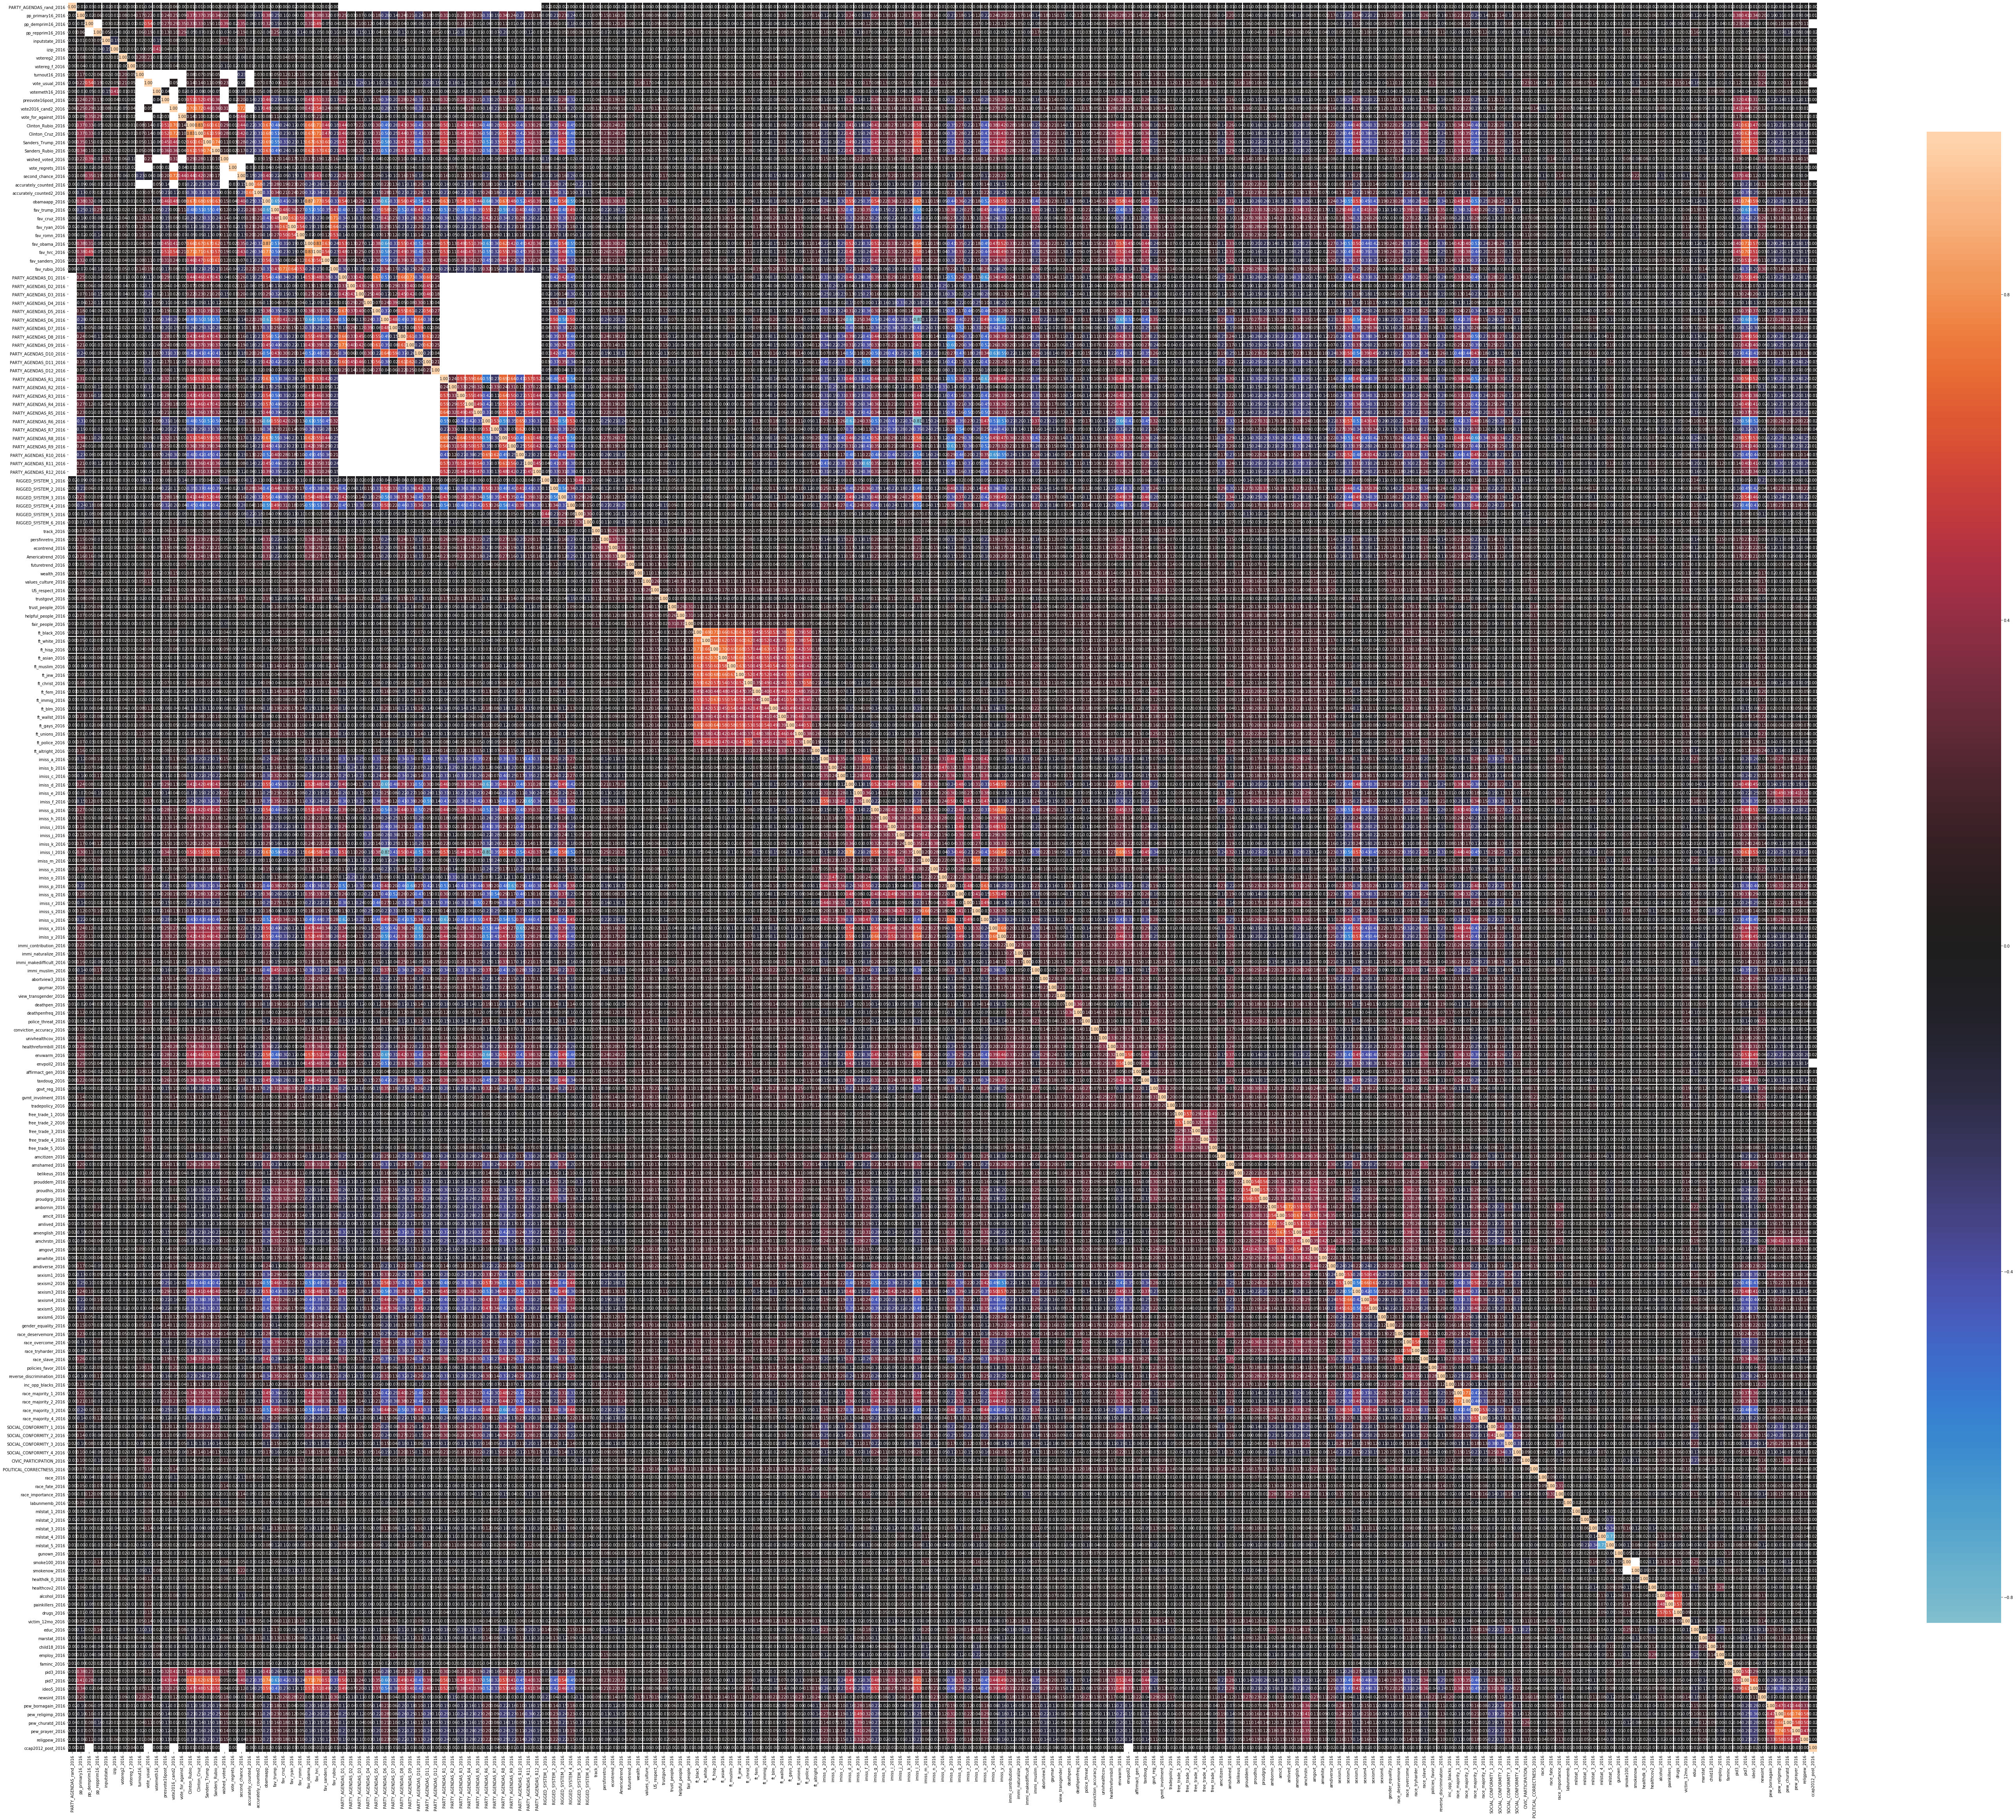

In [22]:
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

In [24]:
df.corr()['presvote16post_2016'].sort_values(ascending=False)

presvote16post_2016            1.000000
Clinton_Cruz_2016              0.519213
fav_hrc_2016                   0.514871
Clinton_Rubio_2016             0.511750
obamaapp_2016                  0.458433
fav_obama_2016                 0.451940
Sanders_Trump_2016             0.448303
pid7_2016                      0.431347
Sanders_Rubio_2016             0.361984
imiss_l_2016                   0.337138
pid3_2016                      0.321077
PARTY_AGENDAS_R8_2016          0.317179
PARTY_AGENDAS_R1_2016          0.316193
ideo5_2016                     0.310242
fav_sanders_2016               0.309649
imiss_y_2016                   0.298675
PARTY_AGENDAS_D1_2016          0.294929
sexism3_2016                   0.292472
PARTY_AGENDAS_R4_2016          0.289812
imiss_d_2016                   0.286599
envwarm_2016                   0.284141
PARTY_AGENDAS_D8_2016          0.282140
imiss_g_2016                   0.280401
PARTY_AGENDAS_R3_2016          0.278829
RIGGED_SYSTEM_3_2016           0.275914


In [29]:
calc = wc.Calculator('weights')